In [4]:
import numpy as np
from matplotlib import pyplot as plt

<h1 align="center">Volume 4: Timber Harvest.</h1>

    NAME: Quin Daly
    Section #
    DATE: 03/31/2022

# Problem 1

Write a function that takes as input scalars $x_{0}$, $k$, $r$, and a final time $T$ and solves the optimal control problem stated above using the RK4 method described above. The function will return the time-step and the values of x and u at the specific time-steps.

In [3]:
def RK4(x0,k,r,T,N=1000,delta=0.001):
    """ Use the RK4 method to compute an approximate solution
    to the ODE y' = f(t, y) at n equispaced parameter values from t0 to t
    with initial conditions y(t0) = y0.
    This function returns an array Y of shape (n,) if
    y is a constant or an array of size 1.
    It returns an array of shape (n, y.size) otherwise.
    In either case, Y[i] is the approximate value of y at
    the i'th value of np.linspace(t0, tf, n).
    """
    t = np.linspace(0,T,N+1)
    h = T/N
    h2 = h/2
    
    x = np.zeros(N+1)
    alpha = np.zeros(N+1)
    u = np.zeros(N+1)
    
    x[0] = x0
        
    # you will need to do something similar for (1.6) but solve for alpha
    # backwards in time and then use (1.7) to update u
    test = -np.inf
    while test <= 0:
        oldx = np.copy(x)
        oldu = np.copy(u)
        oldalpha = np.copy(alpha)
        
        # Do Runge-Kutta for the state
        for i in range(N):
            k1 = k*u[i]*x[i]
            k2 = k*1/2*(u[i]+u[i+1])*(x[i]+h2*k1)
            k3 = k*1/2*(u[i]+u[i+1])*(x[i]+h2*k2)
            k4 = k*u[i+1]*(x[i]+h*k3)
            x[i+1] = x[i]+h/6*(k1+2*k2+2*k3+k4)
            
        # Do Runge-Kutta  backward for costate
        for i in range(N):
            j = N - i
            k1 = u[j] * (np.exp(-r*t[j]) - k*alpha[j]) - np.exp(-r*t[j])
            k2 = 1/2*(u[j]+u[j-1])*(np.exp(-r*(t[j]-h2)) -k*(alpha[j] - h2*k1)) - np.exp(-r*(t[j]-h2))
            k3 = 1/2*(u[j]+u[j-1])*(np.exp(-r*(t[j]-h2)) -k*(alpha[j] - h2*k2)) - np.exp(-r*(t[j]-h2))
            k4 = u[j-1]*(np.exp(-r*(t[j]-h)) -k*(alpha[j] - h*k3)) - np.exp(-r*(t[j]-h))
            alpha[j-1] = alpha[j] - (h/6)*(k1 + 2*k2 + 2*k3 + k4)
            
        u1 = np.zeros(N+1)
        for i in range(N+1):
            temp = x[i]*(k*alpha[i] - np.exp(-r*t[i]))
            if temp > 0:
                u1[i] = 1
            else:
                u1[i] = 0
                
        u = 0.5 * (oldu + u1)   
    
        # use the following for your stopping criteria and stop once test > 0
        temp1 = delta*np.sum(np.abs(u)) - np.sum(np.abs(oldu - u))
        temp2 = delta*np.sum(np.abs(x)) - np.sum(np.abs(oldx - x))
        temp3 = delta*np.sum(np.abs(alpha)) - np.sum(np.abs(oldalpha - alpha))
        test = np.min([temp1, np.min([temp2, temp3])])
        
    return t, x, u

# Problem 2

Using your function from problem 1, plot time vs. timber production ($x$) and plot time vs. reinvestment percentage ($u$) for the following values: $x_{0} = 100$, $k = 1$, $r = 0$, and $T = 5$.


In [6]:
x0 = 100
k = 1
r = 0
T = 5
t, x, u = RK4(x0,k,r,T)

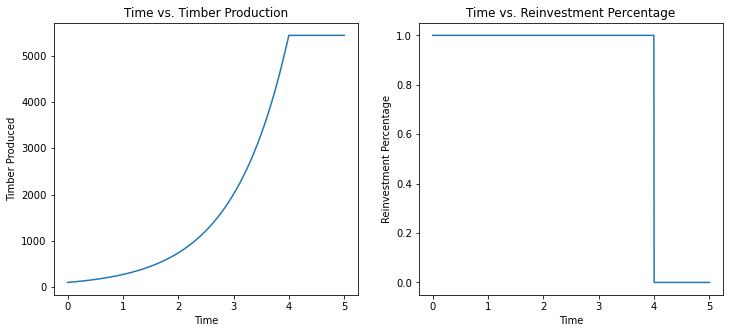

In [12]:
# Plot the solutions
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(t, x)
ax[0].set_title('Time vs. Timber Production')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Timber Produced')
ax[1].plot(t, u)
ax[1].set_title('Time vs. Reinvestment Percentage')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Reinvestment Percentage')
plt.show()

# Problem 3

Plot the same graphs that you did in problem 2, but instead for the following values: $x_{0} = 100$, $k = 0.3$, $r = 0.05$, and $T = 5$. At what time does the switching point occur?

In [13]:
x0 = 100
k = 0.3
r = 0.05
T = 5
t, x, u = RK4(x0, k, r, T)

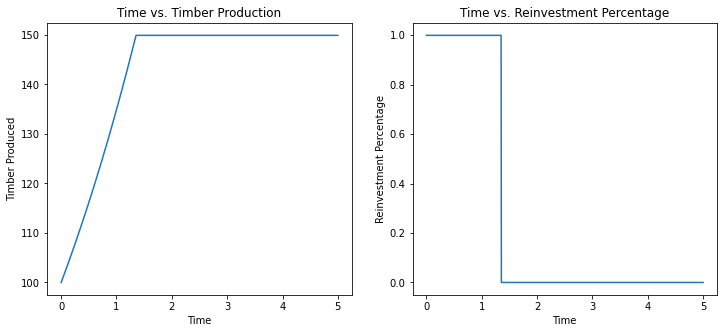

In [14]:
# Plot the solutions
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(t, x)
ax[0].set_title('Time vs. Timber Production')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Timber Produced')
ax[1].plot(t, u)
ax[1].set_title('Time vs. Reinvestment Percentage')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Reinvestment Percentage')
plt.show()

In [19]:
# Find the optimal switching time
for i in range(len(u)):
    if u[i] == 0:
        index = i
        break
        
switching_t = t[index]
print('Switching Time: ' + str(switching_t))

Switching Time: 1.355


# Problem 4

Now use the same parameters as in problem 3, but vary the initial value of the timber production capacity ($x_{0}$). You should try a smaller value, a slightly larger value, and fairly larger value for $x_{0}$. What do you notice about the optimal controls (are they the same or are they different)?


In [15]:
# Change the initial value 3 times
x01 = 75
x02 = 120
x03 = 1000
k = 0.3
r = 0.05
T = 5
t1, x1, u1 = RK4(x01, k, r, T)
t2, x2, u2 = RK4(x02, k, r, T)
t3, x3, u3 = RK4(x03, k, r, T)

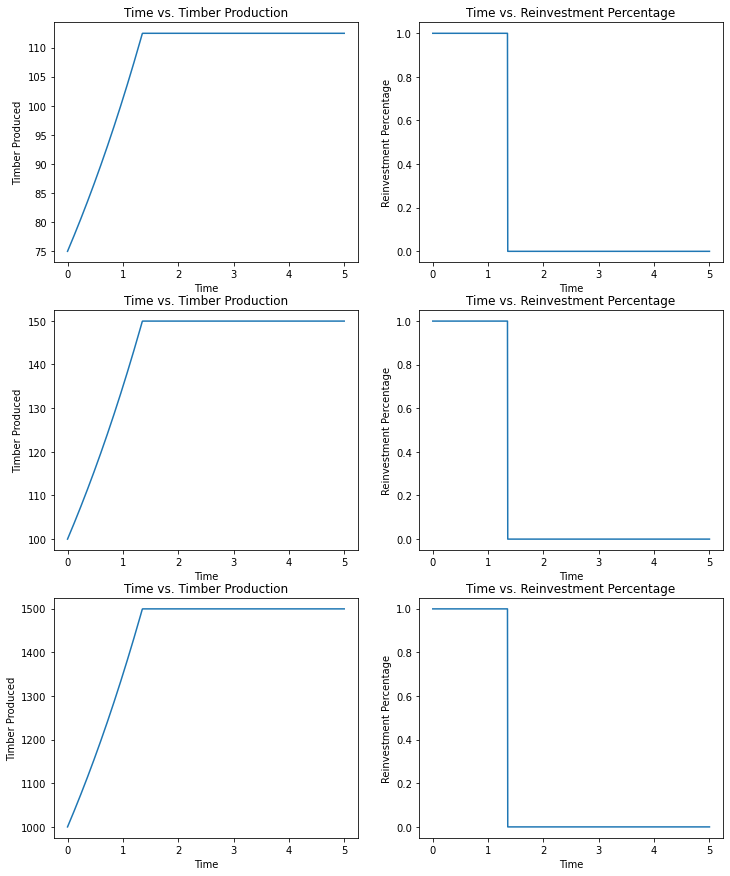

In [17]:
# Plot the solutions
fig, ax = plt.subplots(3,2,figsize=(12,15))
ax[0,0].plot(t1, x1)
ax[0,0].set_title('Time vs. Timber Production')
ax[0,0].set_xlabel('Time')
ax[0,0].set_ylabel('Timber Produced')
ax[0,1].plot(t1, u1)
ax[0,1].set_title('Time vs. Reinvestment Percentage')
ax[0,1].set_xlabel('Time')
ax[0,1].set_ylabel('Reinvestment Percentage')

ax[1,0].plot(t2, x)
ax[1,0].set_title('Time vs. Timber Production')
ax[1,0].set_xlabel('Time')
ax[1,0].set_ylabel('Timber Produced')
ax[1,1].plot(t2, u2)
ax[1,1].set_title('Time vs. Reinvestment Percentage')
ax[1,1].set_xlabel('Time')
ax[1,1].set_ylabel('Reinvestment Percentage')

ax[2,0].plot(t3, x3)
ax[2,0].set_title('Time vs. Timber Production')
ax[2,0].set_xlabel('Time')
ax[2,0].set_ylabel('Timber Produced')
ax[2,1].plot(t, u)
ax[2,1].set_title('Time vs. Reinvestment Percentage')
ax[2,1].set_xlabel('Time')
ax[2,1].set_ylabel('Reinvestment Percentage')
plt.show()